In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statistics import mean

from sklearn.model_selection import GridSearchCV, \
    RandomizedSearchCV  # Hyperparameter tuning - GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, \
    KFold  # Cross-validation - StratifiedKFold, RepeatedStratifiedKFold

from sklearn.ensemble import RandomForestClassifier  # Classifier - Random Forest
from sklearn.linear_model import LogisticRegression  # Classifier - Logistic Regression
from sklearn.tree import DecisionTreeClassifier  # Classifier - Decision Tree

from sklearn.metrics import roc_auc_score  # Evaluation metric - AUC
from sklearn.metrics import f1_score  # Evaluation metric - F1 score
from sklearn.metrics import accuracy_score  # Evaluation metric - Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Final features and hps:
hp_rf = {'criterion': 'gini', 'max_depth': None, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}
hp_dt = {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}
hp_unreg_lr = {'C': 1, 'max_iter': 2000, 'penalty': None, 'solver': 'lbfgs'}
hp_reg_lr = {'C': 1291.5496650148827, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'newton-cg'}
feats = [12, 15, 17, 32, 308, 354, 474, 480, 484, 485, 487, 489, 491, 554, 555, 558, 594, 610, 612, 616, 622, 674, 679, 689, 700, 718, 723, 725, 727, 728, 740, 743, 770, 839, 874, 998, 1000, 1106, 1281, 1296, 1382, 1422, 1593, 1606, 1635, 1636, 1638, 1640, 1646, 1650, 1651, 1654, 1661, 1668, 1681, 1682, 1684, 1687, 1701, 1862, 1877, 1879, 1896, 1902, 1906, 1914, 1950, 1963, 1973, 2047, 2056, 2154, 2168, 2183, 2184, 2185, 2195, 2209, 2212, 2220, 2221, 2224, 2226, 2241, 2281, 2285, 2293, 2379, 2661, 2663, 2709, 2721, 2733, 2748, 2760, 2763, 2764, 2774, 2831, 2833]

In [3]:
# Data preprocessing

# Load data
data = pd.read_table('Train_call.txt')  # Shows the data with samples as rows, so need to transpose
data = data.T  # Transposes data, so that samples are now rows.
data_target = pd.read_table('Train_clinical.txt')  # Gives sample with associated subgroup

# Extract predictor and target data
target = data_target.loc[:,
         "Subgroup"]  # Isolates the subgroups from samples. We need to convert the subgroups into 0, 1, 2
new_data_unlabeled = data.iloc[4:, :]  # This is the complete cleaned up dataset

# We also need to convert the subgroups into 0, 1, 2
for i in range(len(target)):
    if target[i] == "HER2+":
        target[i] = 0
    elif target[i] == "HR+":
        target[i] = 1
    elif target[i] == "Triple Neg":
        target[i] = 2

# Now split data into train/test set with OPTIMAL features
new_data_unlabeled = new_data_unlabeled.iloc[:, feats]

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_data_unlabeled, target, test_size=0.2,
                                                    random_state=42)
y_train = y_train.astype(int)  # For some reason the numbers are read as strings, so convert to integers

In [5]:
# Train optimal model
rf_classifier = RandomForestClassifier(**hp_rf)
dt_classifier = DecisionTreeClassifier(**hp_dt)
lr_reg_classifier = LogisticRegression(**hp_reg_lr)
lr_unreg_classifier = LogisticRegression(**hp_unreg_lr)

rf_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
lr_reg_classifier.fit(X_train, y_train)
lr_unreg_classifier.fit(X_train, y_train)

# Test performance on test set
rf_y_predict = rf_classifier.predict(X_test)
dt_y_predict = dt_classifier.predict(X_test)
lr_reg_y_predict = lr_reg_classifier.predict(X_test)
lr_unreg_y_predict = lr_unreg_classifier.predict(X_test)

In [6]:
# Compute accuracy
y_test = [y_test.iloc[i] for i in range(len(y_test))]

rf_acc = accuracy_score(y_test, rf_y_predict)
dt_acc = accuracy_score(y_test, dt_y_predict)
lr_reg_acc = accuracy_score(y_test, lr_reg_y_predict)
lr_unreg_acc = accuracy_score(y_test, lr_unreg_y_predict)

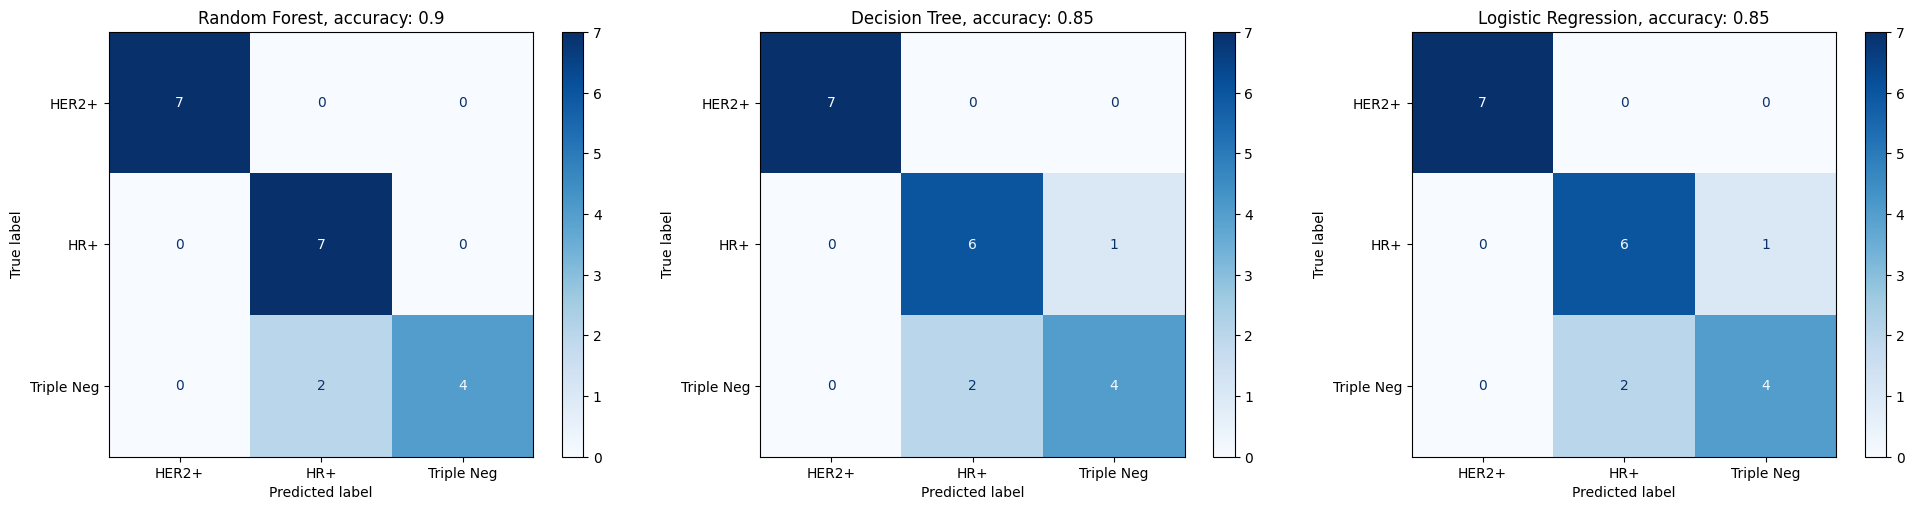

In [9]:
# Calculate confusion matrices
rf_confusion_matrix = confusion_matrix(y_test, rf_y_predict)
dt_confusion_matrix = confusion_matrix(y_test, dt_y_predict)
lr_reg_confusion_matrix = confusion_matrix(y_test, lr_reg_y_predict)
lr_unreg_confusion_matrix = confusion_matrix(y_test, lr_unreg_y_predict)

# Define display labels
display_labels = ["HER2+", "HR+", "Triple Neg"]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot confusion matrices
ConfusionMatrixDisplay(confusion_matrix=rf_confusion_matrix, display_labels=display_labels).plot(cmap="Blues", ax=axs[0])
axs[0].set_title(f'Random Forest, accuracy: {rf_acc}')

ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix, display_labels=display_labels).plot(cmap="Blues", ax=axs[1])
axs[1].set_title(f'Decision Tree, accuracy: {dt_acc}')

ConfusionMatrixDisplay(confusion_matrix=lr_reg_confusion_matrix, display_labels=display_labels).plot(cmap="Blues", ax=axs[2])
axs[2].set_title(f'Logistic Regression, accuracy: {lr_reg_acc}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


2184    0.285369
489     0.024215
2760    0.023186
2212    0.021132
839     0.020080
dtype: float64


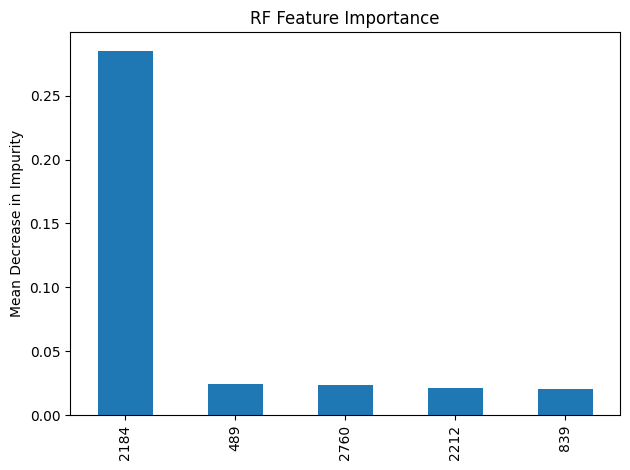

In [8]:
# Feature importance

importance = rf_classifier.feature_importances_
names_features = X_train.columns

# plot feature importance
forest_importances = pd.Series(importance, index=names_features)
sort_forest_importances = forest_importances.sort_values(ascending = False)
top_forest_importances = sort_forest_importances[:5]

print(top_forest_importances)

fig, ax = plt.subplots()
top_forest_importances.plot.bar(ax=ax)

ax.set_title("RF Feature Importance")
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()